In [ ]:
# !pip install tensorflow==1.5.0

In [ ]:
# import tensorflow

In [ ]:
# tensorflow.__version__

In [ ]:
!pip install kaggle

In [ ]:
# 自分のマイドライブにマウントする

from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
mkdir .kaggle

In [ ]:
ls -a

./  ../  .config/  drive/  .kaggle/  sample_data/


# New Section

In [ ]:
# https://www.kaggle.com/　へアクセスし、ログイン後に右上のプロフィール画像をクリック、さらに"My Account"をクリックする
# このサイトの「API」項目にある"Create New API Token"をクリックすると、kaggle.jsonファイルが自動的にダウンロードされる
# ローカルで、kaggle.json（ダウンロードフォルダにあるはず）をエディターで開く。
# このセルの以下のコードにある token = {'username':'***','key':'***'} における「***」部分を、
# ダウンロードしたkaggle.jsonを参照して書き換え、このセルを実行する

import json

token = {"username":"tkyiws","key":"7eca0f661c4121148aa73a66cf8c82ce"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [ ]:
!chmod 600 /content/.kaggle/kaggle.json

In [ ]:
pwd

'/content'

In [ ]:
ls -a .kaggle

./  ../  kaggle.json


In [ ]:
mkdir　/root/.kaggle/

In [ ]:
!cp -R /content/.kaggle/kaggle.json /root/.kaggle/

In [ ]:
!ls -a /root/.kaggle/

.  ..  kaggle.json


In [ ]:
# kaggle APIコマンドが使えるかどうかを確認


!kaggle competitions list

ref                                               deadline             category            reward  teamCount  userHasEntered  
------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
tpu-getting-started                               2030-06-03 23:59:00  Getting Started      Kudos         67           False  
digit-recognizer                                  2030-01-01 00:00:00  Getting Started  Knowledge       3517           False  
titanic                                           2030-01-01 00:00:00  Getting Started  Knowledge      26532           False  
house-prices-advanced-regression-techniques       2030-01-01 00:00:00  Getting Started  Knowledge       5962            True  
connectx                                          2030-01-01 00:00:00  Getting Started  Knowledge        607           False  
nlp-getting-started                               2030-01-01 00:00:00  Getting Started      Kudos       1881   

In [ ]:
# カレントディレクトリの変更

import os

os.chdir('/content/drive/My Drive/sprint19')

# カレントディレクトリの取得
print(os.getcwd())

/content/drive/My Drive/sprint19


In [ ]:
# !kaggle competitions download -c tgs-salt-identification-challenge

In [ ]:
# !unzip /content/drive/'My Drive'/sprint19/train.zip -d /content/drive/'My Drive'/sprint19/train_data

In [ ]:
# !unzip /content/drive/'My Drive'/sprint19/test.zip -d /content/drive/'My Drive'/sprint19/test_data

# 【問題1】学習・推定
以下のKeras実装を使用して学習・推定を行ってください。


[zhixuhao/unet: unet for image segmentation](https://github.com/zhixuhao/unet)


《GPU環境での学習》


大規模なデータセット、大きなモデルになるため、GPUを使用する必要があります。


《新たなデータセットの適用》


公開されている実装で用意されたものとは異なるデータセットを入力するための準備が必要です。

In [ ]:
!git clone https://github.com/zhixuhao/unet.git

Cloning into 'unet'...
remote: Enumerating objects: 394, done.
remote: Total 394 (delta 0), reused 0 (delta 0), pack-reused 394
Receiving objects: 100% (394/394), 44.92 MiB | 16.80 MiB/s, done.
Resolving deltas: 100% (79/79), done.
Checking out files: 100% (253/253), done.


In [ ]:
os.chdir('/content/drive/My Drive/sprint19/unet')

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import glob 

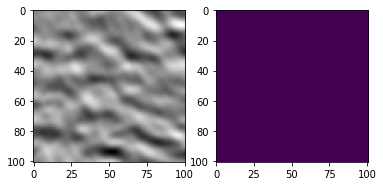

In [ ]:
img = Image.open('/content/drive/My Drive/sprint19/train_data/images/000e218f21.png')
msk = Image.open('/content/drive/My Drive/sprint19/train_data/masks/000e218f21.png')
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(msk)

In [ ]:
from model import *
from data import *

#os.environ["CUDA_VISIBLE_DEVICES"] = "0"


data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,
                        '/content/drive/My Drive/sprint19/train_data',
                        'images',
                        'masks',
                        data_gen_args,save_to_dir = None,
                        )

model = unet()
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=300,epochs=3,callbacks=[model_checkpoint])

/content/drive/My Drive/sprint19/unet/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


Epoch 1/3
Found 4000 images belonging to 1 classes.
Found 4000 images belonging to 1 classes.
300/300 [==============================] - 52s 172ms/step - loss: 0.6237 - accuracy: 0.7405

Epoch 00001: loss improved from inf to 0.62366, saving model to unet_membrane.hdf5
Epoch 2/3
300/300 [==============================] - 52s 172ms/step - loss: 0.5509 - accuracy: 0.7445

Epoch 00002: loss improved from 0.62366 to 0.55093, saving model to unet_membrane.hdf5
Epoch 3/3
300/300 [==============================] - 52s 174ms/step - loss: 0.5271 - accuracy: 0.7616

Epoch 00003: loss improved from 0.55093 to 0.52707, saving model to unet_membrane.hdf5


In [ ]:
testimg_list = glob.glob('/content/drive/My Drive/sprint19/test_data/images' + '/*' + ".png")
print(testimg_list[0]) 
len(testimg_list) # 200枚推定画像が入ってしまった。

/content/drive/My Drive/sprint19/test_data/images/8cf16aa0f5.png


18200

In [ ]:
def testGenerator(test_path,num_image = 30,
                  target_size = (256,256),
                  flag_multi_class = False,
                  as_gray = True):
    for i in range(num_image):
        img = io.imread(os.path.join(testimg_list[i]),as_gray = as_gray)
        img = img / 255
        img = trans.resize(img,target_size)
        img = np.reshape(img,img.shape+(1,)) if (not flag_multi_class) else img
        img = np.reshape(img,(1,)+img.shape)
        yield img

In [ ]:
testGene = testGenerator("/content/drive/My Drive/sprint19/test_data/images")
results = model.predict_generator(testGene,30,verbose=1)
saveResult("/content/drive/My Drive/sprint19/test_data/pred",results)

30/30 [==============================] - 1s 38ms/step


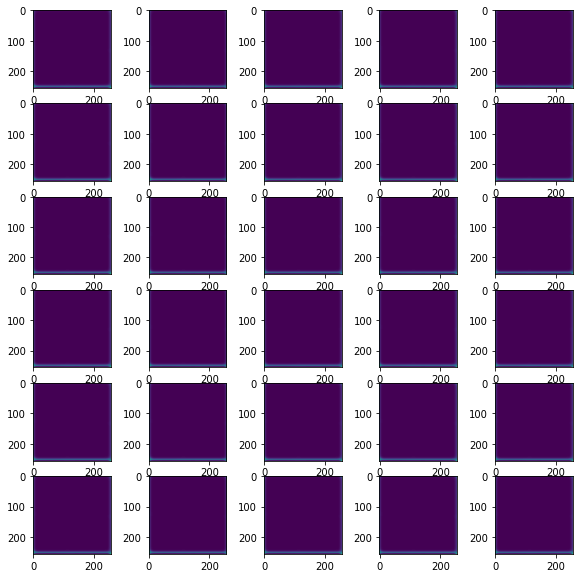

In [ ]:
pre_list = glob.glob('/content/drive/My Drive/sprint19/test_data/pred' + '/*' + ".png")
plt.figure(figsize=(10, 10))
for i, im in enumerate(pre_list):
    img = Image.open(im)
    plt.subplot(len(pre_list)/5, 5, i+1)
    plt.imshow(pre_img)

# 【問題2】コードリーディング
論文[1]に目を通した上で、上記実装のコードリーディングを行ってください。

U-Netは出力も画像で得られるように「fully convolution networt(FCN)」と呼ばれる全畳み込み層からなる。それによって生じる問題を次のように解決する。まず広域な画像の特徴を元にした認識を行うためには極端な多層化が必要になる問題に対して、ダウンサンプリング（contracting path）によって少層で画像の参照領域を拡大する。次に、アップサンプリング（expansive path）によって解像度を復元する。それだけでは元の画像の特徴が薄れ、ぼやけたような画像になる為、スキップコネクションでダウンサンプリング前の高解像度の特徴を後段のアップサンプリング後の特徴と結合することでダウンサンプリング後に抽出された広い範囲の特徴と解像度を保つ為に必要な高解像度の特徴の両方を使って確率マップを出力することができる。また、バックプロパゲーションの際にも安定化と高速化に寄与する構成となっている。



```python
def unet(pretrained_weights = None,input_size = (256,256,1)):
    inputs = Input(input_size)
    # contracting path
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)
    
    # expansive path
    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3) # skip-conection
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3) # skip-conection 
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3) # skip-conection
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3) # skip-conection
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(input = inputs, output = conv10)

    model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model
```